In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

2022-07-24 20:50:26.826577: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-24 20:50:26.826599: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape # 60000 images, all of which are 28 by 28 pixels
type(train_images)

numpy.ndarray

In [4]:
train_images[0,23, 23] # one pixel: greyscale value of this pixel

194

In [5]:
train_labels[:10] # 10 different classes from the data set

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

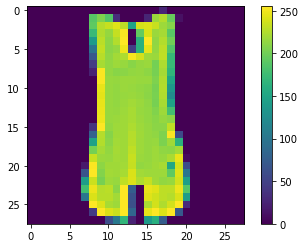

In [7]:
# looking at different images
plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.show()

# Data Preprocessing

In [8]:
train_images  = train_images / 255.0
test_images = test_images / 255.0
# try to ensure input values are between 0 and 1

# Building the Model

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,  28)),   # input layer (1)
    keras.layers.Dense(128,  activation='relu'),   # hidden layer (2)
    keras.layers.Dense(10,  activation='softmax') # output layer (3)
])

2022-07-24 20:50:41.561877: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-24 20:50:41.561915: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2022-07-24 20:50:41.562412: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Training the Model

In [11]:
model.fit(train_images, train_labels, epochs=8)

Epoch 1/8


2022-07-24 20:50:41.831823: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.4953 - accuracy: 0.8252
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3696 - accuracy: 0.8665
Epoch 3/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3342 - accuracy: 0.8785
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3124 - accuracy: 0.8858
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2948 - accuracy: 0.8917
Epoch 6/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2796 - accuracy: 0.8964
Epoch 7/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2662 - accuracy: 0.8997
Epoch 8/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2579 - accuracy: 0.9033


# Testing the model on our testing data

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1) # verbose: how much info we want output
print('Test accuracy: ', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3457 - accuracy: 0.8752
Test accuracy:  0.8751999735832214


# Making Predictions

In [13]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [16]:
print(predictions[0]) # outputs the probability distribution of the 10 classses

[1.0556998e-05 3.5933192e-07 7.0082967e-07 4.4913218e-06 1.9821140e-05
 1.6479118e-02 4.1818357e-06 2.5336275e-01 1.6663957e-05 7.3010141e-01]


In [17]:
print(class_names[np.argmax(predictions[0])])

Ankle boot


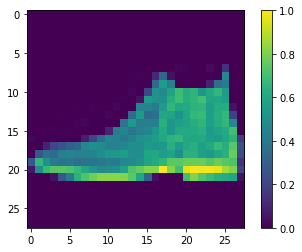

In [18]:
# checking to see if it is correct!
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.show()